## Differential Equations 

### Following is the equation we're finding a solution for:

$\begin{align} 
    f'' = \bigg(- \omega^2 + \frac{l (l+1) (1 - \frac{2M}{r})}{r^2} \bigg) * f
\end{align}$


#### To solve this, we split this equation into a system of two first order equations as follows:

$\begin{align} 
    z = f'
\end{align}$

$\begin{align} 
    z' = \bigg(- \omega^2 + \frac{l (l+1) (1 - \frac{2M}{r})}{r^2} \bigg) * f
\end{align}$

#### Then we use the RK-4 method to solve these two equations simultaneously

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.optimize import fsolve

In [2]:
#Define the function that returns the diff. equations as a vector

def diff_eq(r, z_vector):
    
    #Define parameteres  ###QUESTION: Do we define them inside or outside the function? Later could be instances of class
    omega = 1.
    l = 1. #angular momentum 
    M = 1. #blackhole mass
    
    f = z_vector[0]
    z = z_vector[1]
    
    f_prime = z
    
    z_prime = -omega**2 + ((l * (l+1) *(1 - (2*M)/r)) / r) * f
    
    return np.asarray([f_prime, z_prime], dtype = np.complex)

In [3]:
#Initial conditions

f_i = 0. 
z_i = 0.

#Initial conditions in a vector form
i_vector = np.asarray([f_i, z_i])

#Vector we send to the function above
z_vector = np.asarray([f_i, z_i])

/Users/arijitdas/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/arijitdas/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


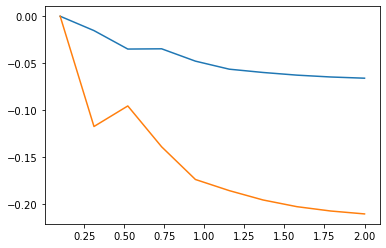

In [5]:
#Apply Runge-Kutta method here

r_initial = 0.1 
r_final = 2.
N = 10 #number of steps


r_points = np.linspace(r_initial, r_final, N)

f_points = [] 
z_points = []

z_vector = np.asarray([f_i, z_i])

for r in r_points:
    
    step_size = (r_final - r_initial) / (N-1)
    f_points.append(z_vector[0])
    z_points.append(z_vector[1])
    
    
    k1 = step_size * diff_eq(r, z_vector)
    
    k2 = step_size * diff_eq(r + 0.5*step_size, z_vector + 0.5*k1)
    
    k3 = step_size * diff_eq(r + 0.5*step_size, z_vector + 0.5*k2)
    
    k4 = step_size * diff_eq(r + step_size, z_vector + k3)
    
    z_vector = (k1 + 2*k2 + 2*k3 + k4) / 6
    
 

plt.plot(r_points, f_points)
plt.plot(r_points, z_points)


    